In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('covid_19_clean_complete.csv')

In [7]:
#check columns
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [8]:
#preview rows
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [9]:
#Identify missing values
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
# Task 2: Data Cleaning

In [23]:
#Filtering countries of interest
# List of countries
countries_of_interest = ['Kenya', 'US', 'India',]

# Filter the DataFrame
# filtered_df = df[df['Country/Region'].isin(countries_of_interest)]
filtered_df = df[df['Country/Region'].isin(countries_of_interest)].copy()

# Display the first few rows
filtered_df.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
140,NaN,Kenya,-0.023600,37.90620,2020-01-22,0,0,0,0,Africa
223,NaN,US,40.000000,-100.00000,2020-01-22,1,0,0,1,Americas
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
401,NaN,Kenya,-0.023600,37.90620,2020-01-23,0,0,0,0,Africa


In [11]:
#Dropping Rows with missing dates/critical values
filtered_df = filtered_df.dropna(subset=['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active'])

In [12]:
#Convert Date column to datetime
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

In [13]:
#Handling missing numeric values using Interpolate
filtered_df[['Confirmed', 'Deaths', 'Recovered', 'Active']] = filtered_df[['Confirmed', 'Deaths', 'Recovered', 'Active']].interpolate()

In [ ]:
#Task 3: Exploratory Data Analysis (EDA)

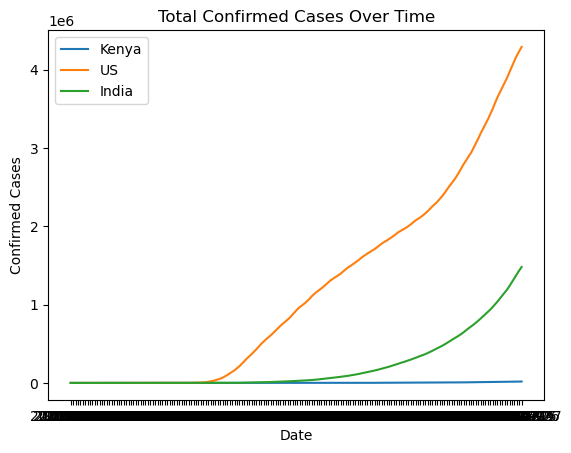

In [24]:
#Plot Total Cases Over Time for Selected Countries
import matplotlib.pyplot as plt

for country in countries_of_interest:
    country_data = filtered_df[filtered_df['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)

plt.title('Total Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

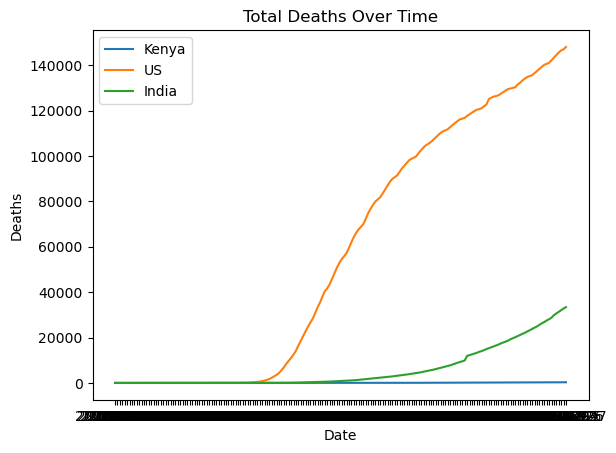

In [25]:
#Plot total deaths over time
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Deaths'], label=country)

plt.title('Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.show()

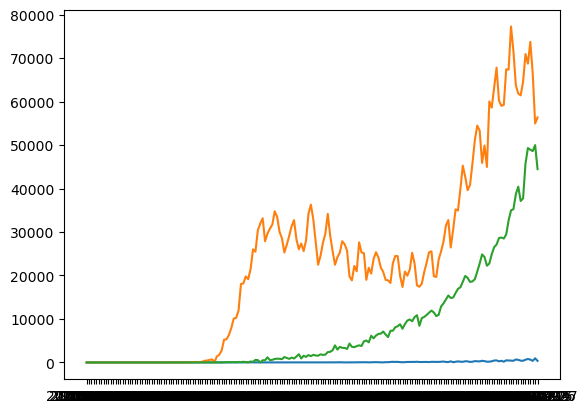

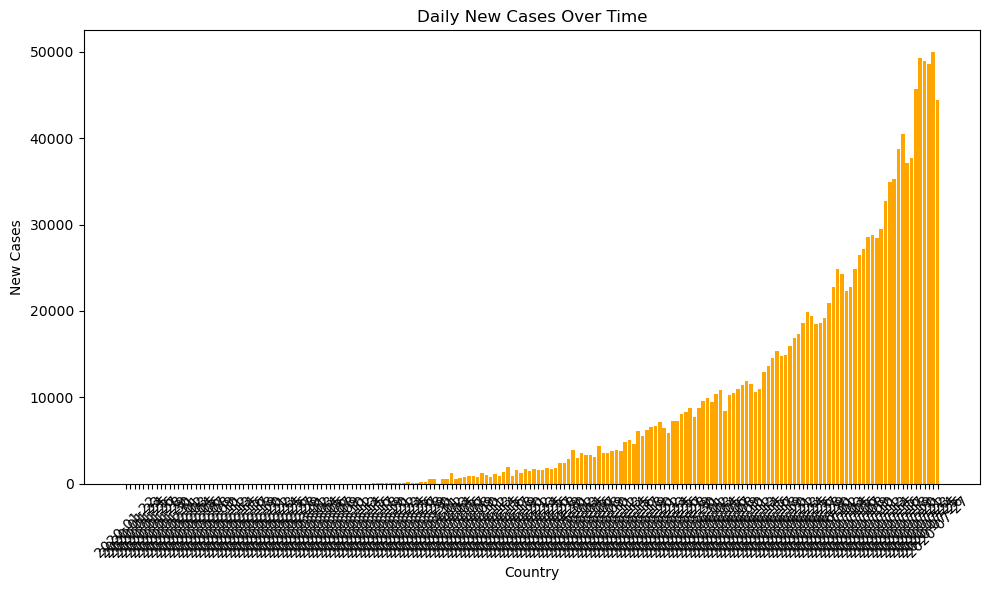

In [34]:
# Compare Daily New Cases Between Countries
filtered_df['Daily_New_Cases'] = filtered_df.groupby('Country/Region')['Confirmed'].diff().fillna(0)

for country in countries_of_interest:
    country_data = filtered_df[filtered_df['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Daily_New_Cases'], label=country)
    
plt.figure(figsize=(10, 6))
plt.bar(country_data['Date'], country_data['Daily_New_Cases'], color='orange')
plt.title('Daily New Cases Over Time')
plt.ylabel('New Cases')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
#Calculate the Death Rate: total_deaths / total_cases
filtered_df['Death_Rate'] = (filtered_df['Deaths'] / filtered_df['Confirmed']).fillna(0)

#Task 4: Insights and Reporting

Key Insights from the COVID-19 Data

US exhibited the highest overall confirmed cases among the selected countries, indicating a large-scale outbreak that spanned multiple waves.

The United States showed consistent increases in daily new cases, reflecting multiple waves and ongoing transmission challenges over time.

South Africa had a relatively lower cumulative case count, yet showed sharp peaks at specific intervals — possibly indicating distinct waves or limited testing/reporting capacity.

Kenya maintained moderate case numbers throughout the pandemic, with occasional spikes in daily new cases reflecting possible variants or testing drives.

Death rates varied significantly, with some countries like Brazil showing a higher proportion of deaths relative to confirmed cases, suggesting a heavier toll or overwhelmed healthcare systems.

⚠️ Notable Anomalies and Patterns

Daily new case data for some countries displayed sudden spikes or drops, which may be due to batch reporting, delays, or data reconciliation efforts.

Some countries had extended periods with zero or extremely low recovery updates, indicating possible underreporting or a focus on tracking only confirmed and death cases.

Discrepancies between active and recovered cases in some countries highlight inconsistencies or delays in data updates.

✅ Conclusion

The COVID-19 data underscores how pandemic trends differed across regions based on testing capacity, health infrastructure, and government responses. Reliable, timely data reporting is essential for meaningful cross-country comparisons and informed public health interventions